In [1]:
# https://github.com/NESTCollaboration/larnestpy
%matplotlib widget
import larnestpy
import matplotlib.pyplot as plt
import numpy as np
calc = larnestpy.LArNEST()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
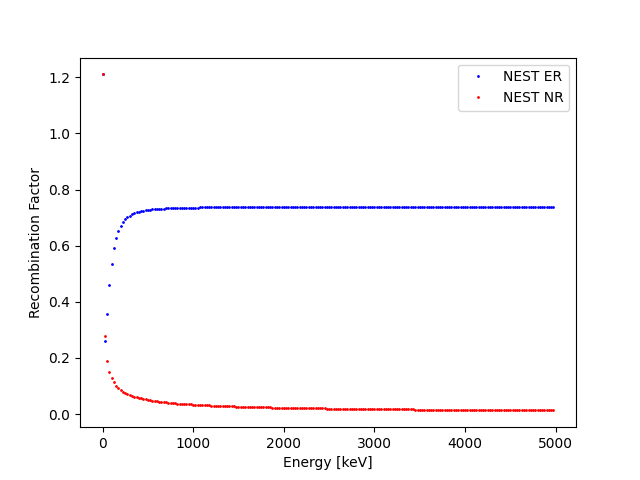

In [2]:
# calculate R factors for ER at various energies
high_energy = 5000
energies_ER = np.arange(0.001, high_energy, 25, dtype=np.float32)

Rs_ER = np.zeros_like(energies_ER)
for i, energy in enumerate(energies_ER):
    result = calc.full_calculation(larnestpy.LArInteraction.ER, energy, 1, 500, 1.393, False)
    R = 1-result.yields.RecombinationProbability
    Rs_ER[i] = R

# calculate R factors for NR at various energies
high_energy = 5000
energies_NR = np.arange(0.001, high_energy, 25, dtype=np.float32)

Rs_NR = np.zeros_like(energies_NR)
for i, energy in enumerate(energies_NR):
    result = calc.full_calculation(larnestpy.LArInteraction.NR, energy, 1, 500, 1.393, False)
    R = 1-result.yields.RecombinationProbability
    Rs_NR[i] = R
    
plt.plot(energies_ER, Rs_ER, 'bo', markersize = 1, label='NEST ER')
plt.plot(energies_NR, Rs_NR, 'ro', markersize = 1, label='NEST NR')
plt.xlabel('Energy [keV]')
plt.ylabel('Recombination Factor')
plt.legend()

output_filename = 'NEST_ER_NR_up_to_5MeV.npz'
np.savez(output_filename, E_ER=energies_ER*1e-3, R_ER=Rs_ER, E_NR=energies_NR*1e-3, R_NR=Rs_NR)